In [1]:
import mglearn

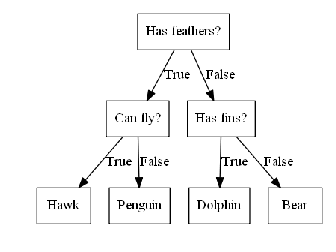

In [4]:
mglearn.plots.plot_animal_tree()

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

In [7]:
column_name = iris.feature_names

In [8]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [9]:
import pandas as pd
X_df = pd.DataFrame(X, columns=column_name)
X_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [11]:
import matplotlib.pyplot as plt

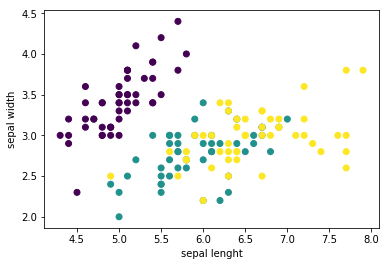

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.show()

In [14]:
for depth in range(1, 6):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=3,
                                                      max_features="sqrt", random_state=0)
    model_tree = model.fit(X_train, y_train)
    print('Depth:', depth, end=' -> ')
    print("Trainset accuracy:{:.4f}".format(model_tree.score(X_train, y_train)), end=' / ')
    print("Testset accuracy:{:.4f}".format(model_tree.score(X_test, y_test)))

Depth: 1 -> Trainset accuracy:0.6833 / Testset accuracy:0.6000
Depth: 2 -> Trainset accuracy:0.9667 / Testset accuracy:0.9333
Depth: 3 -> Trainset accuracy:0.9667 / Testset accuracy:0.9333
Depth: 4 -> Trainset accuracy:0.9667 / Testset accuracy:0.9333
Depth: 5 -> Trainset accuracy:0.9750 / Testset accuracy:0.9333


In [15]:
#feature의 중요도
model_tree.feature_importances_

array([0.        , 0.01785385, 0.02612775, 0.9560184 ])

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(model_tree, out_file="model_tree.dot", class_names=iris.target_names,
                           feature_names=iris.feature_names, filled=True)

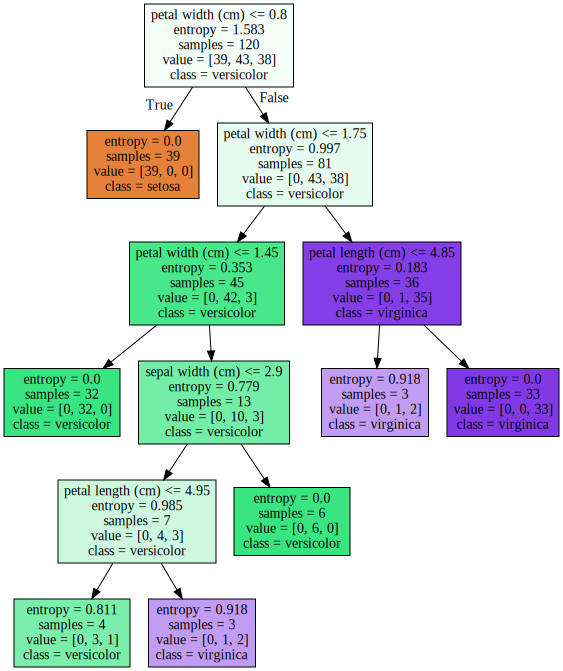

In [17]:
import graphviz

with open("model_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))